In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
# Load the dataset
stocks_data = pd.read_csv("stocks.csv")

# Display the first few rows of the dataset
print(stocks_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [3]:
# Descriptive Statistics for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()

print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


In [4]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

In [5]:
# Create a subplot
fig = make_subplots(rows=1, cols=1)

In [6]:
# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace( go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),row=1, col=1)

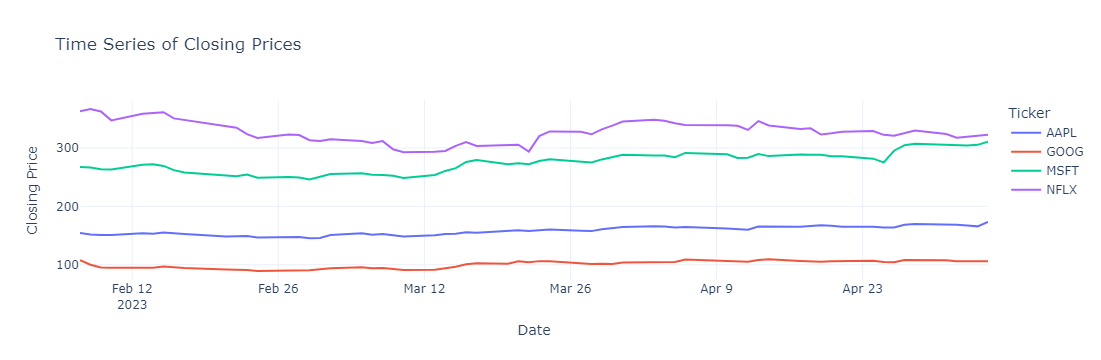

In [10]:
# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)
# Show the plot
fig.show()

In [11]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

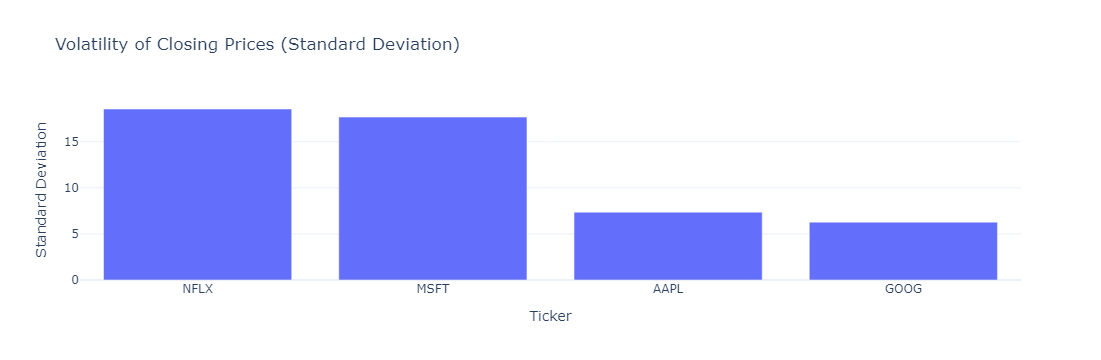

In [12]:
fig = px.bar(volatility, x=volatility.index, y=volatility.values, labels={'y': 'Standard Deviation', 'x': 'Ticker'}, 
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

In [13]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

In [14]:
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

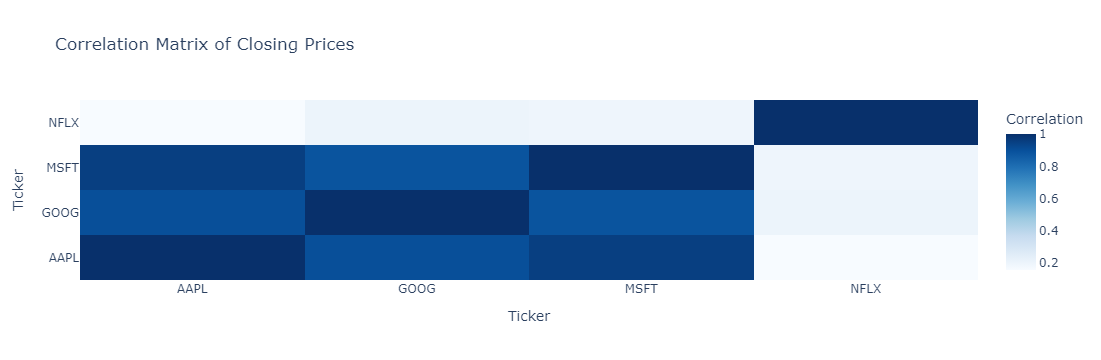

In [15]:
# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

In [16]:
# Comparative Analysis
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

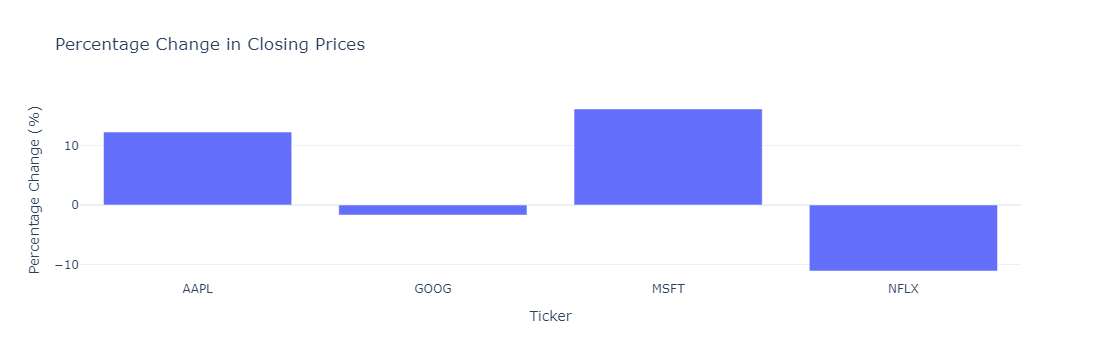

In [17]:
fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

In [19]:
# Daily Risk Vs. Return Analysis
daily_returns = pivot_data.pct_change().dropna()

In [20]:
# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

In [21]:
# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

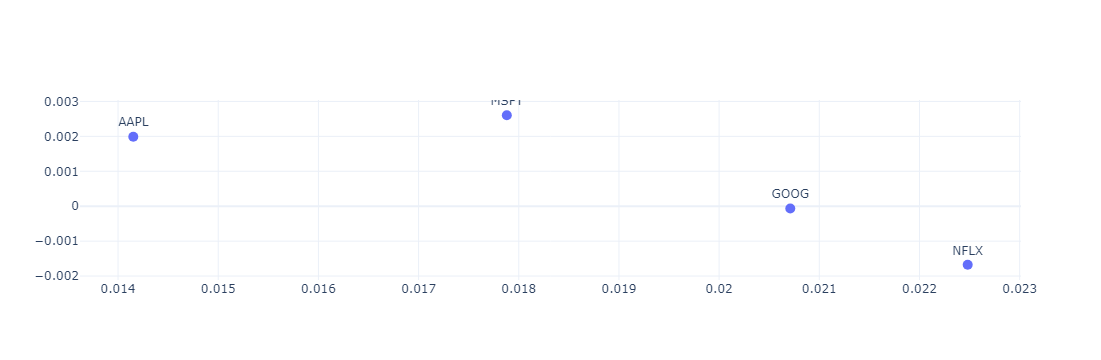

In [22]:
# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

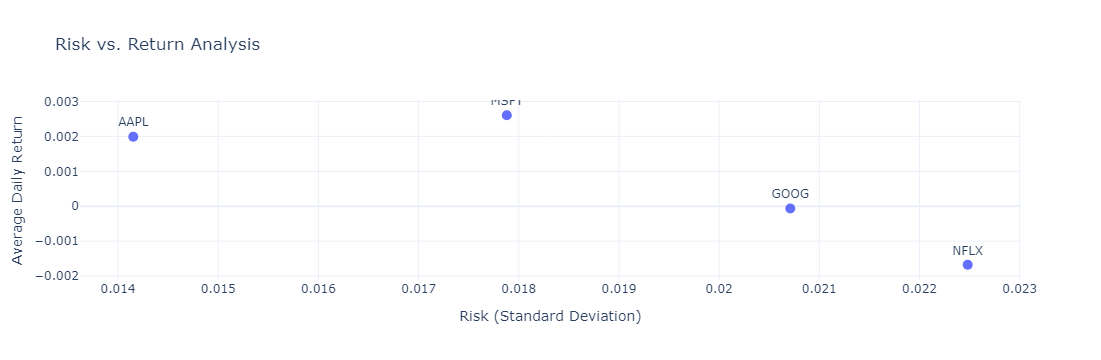

In [23]:
# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()